In [1]:
import pandas as pd

## Load Data from pickles

In [2]:
listings = pd.read_pickle('../data/processed/etap2/listings_e2_df.pkl')
calendar = pd.read_pickle('../data/processed/etap2/calendar_e2_df.pkl')

In [3]:
import sys
sys.path.append('../scripts')
from create_target_variables import TargetVariableGenerator

In [4]:
generator = TargetVariableGenerator()
target_variables = generator.generate_targets(calendar, listings)

[14:31:27] 🎯 Starting Target Variable Generation
[14:31:27] Calendar data shape: (17363102, 5)
[14:31:27] 📅 Preparing calendar data
[14:31:30] Removed 887 rows with invalid prices
[14:31:36] Calendar prepared: 2024-12-11 00:00:00 to 2025-12-21 00:00:00
[14:31:36] Covering 375 days for 95137 listings
[14:31:36] 🏠 Applying listings context filters
[14:31:37] Filtered out 48273 listings with extreme minimum nights
[14:31:37] 📊 Calculating observed performance metrics
[14:31:39] Calculated performance for 46864 listings
[14:31:39] Average observation period: 363.0 days
[14:31:39] 🌊 Applying seasonality adjustments
[14:31:39] Processing listing 1/46864
[14:31:39] Processing listing 2/46864
[14:31:39] Processing listing 3/46864
[14:31:39] Processing listing 4/46864
[14:31:39] Processing listing 5/46864
[14:31:39] Processing listing 6/46864
[14:31:39] Processing listing 7/46864
[14:31:39] Processing listing 8/46864
[14:31:39] Processing listing 9/46864
[14:31:39] Processing listing 10/46864
[

In [5]:
target_variables.head()

,listing_id,annual_revenue_adj,occupancy_rate_adj,adr_adj,confidence_score,confidence_level,observation_days,total_bookings,total_observations,annualization_factor,combined_seasonality_factor,annual_revenue_raw,raw_occupancy_rate,raw_adr,data_quality_flags
0,13913,1057.828988,0.047023,61.590120,95.0,high,364,10,196,1.003434,1.055364,652.232143,0.051020,65.0,[]
1,17402,26983.093325,0.153880,480.086405,100.0,high,360,30,180,1.014583,1.058143,15462.250000,0.166667,508.0,[]
2,24328,16952.163032,0.215504,215.366843,100.0,high,362,38,165,1.008978,1.044729,8626.761050,0.230303,225.0,[]
4,36299,30907.544467,0.363162,233.009339,100.0,high,359,70,180,1.017409,1.051460,17448.572423,0.388889,245.0,[]
5,36660,7753.364958,0.272508,77.897087,100.0,high,361,53,181,1.011773,1.052671,4397.164820,0.292818,82.0,[]


In [9]:
listings = listings.merge(
    target_variables[['listing_id', 'annual_revenue_adj']],
    left_on='id',
    right_on='listing_id',
    how='left'
)

In [11]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
# Drop columns that are not needed for the analysis
listings.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'listing_id', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'bathrooms_text', 'price',  'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',], inplace=True)
listings.drop(columns=['minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated'], inplace=True)

In [16]:
listings.head()

,id,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,instant_bookable,price_cleaned,annual_revenue_adj
0,18974065,Lewisham,Entire rental unit,Entire home/apt,4,1.0,1.0,1.0,"[""Cooking basics"", ""Breakfast"", ""Stove"", ""Hair...",f,85.0,15356.627237
1,1074535877676155362,Haringey,Entire rental unit,Entire home/apt,4,2.0,2.0,2.0,"[""Cooking basics"", ""Fire extinguisher"", ""Stove...",f,129.0,22202.482461
2,796304692597746009,Ealing,Entire rental unit,Entire home/apt,3,1.0,1.0,1.0,"[""Cooking basics"", ""Fire extinguisher"", ""Eleva...",t,160.0,14643.499117
3,36942349,Hackney,Entire condo,Entire home/apt,2,NaN,1.0,NaN,"[""Wifi"", ""Hot water"", ""Washer"", ""Cooking basic...",f,NaN,22791.693682
4,629991867534346504,Kensington and Chelsea,Entire condo,Entire home/apt,2,1.0,1.0,1.0,"[""Cooking basics"", ""Fire extinguisher"", ""Stove...",t,169.0,25301.551212


In [27]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27741 entries, 0 to 47570
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      27741 non-null  int64  
 1   neighbourhood_cleansed  27741 non-null  object 
 2   property_type           27741 non-null  object 
 3   room_type               27741 non-null  object 
 4   accommodates            27741 non-null  int64  
 5   bathrooms               27741 non-null  float64
 6   bedrooms                27741 non-null  float64
 7   beds                    27741 non-null  float64
 8   amenities               27741 non-null  object 
 9   instant_bookable        27741 non-null  object 
 10  price_cleaned           27741 non-null  float64
 11  annual_revenue_adj      27741 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 2.8+ MB


In [29]:
listings["neighbourhood_cleansed"].value_counts()

neighbourhood_cleansed
Westminster               3703
Kensington and Chelsea    2084
Tower Hamlets             1993
Camden                    1955
Hackney                   1572
Southwark                 1428
Wandsworth                1375
Lambeth                   1366
Islington                 1314
Hammersmith and Fulham    1173
Brent                      926
Lewisham                   734
Newham                     731
Barnet                     718
Ealing                     699
Haringey                   677
Greenwich                  607
Waltham Forest             575
Croydon                    507
Merton                     419
Hounslow                   376
Richmond upon Thames       339
Redbridge                  298
Enfield                    283
Hillingdon                 263
Bromley                    261
Barking and Dagenham       256
Harrow                     213
City of London             201
Kingston upon Thames       194
Bexley                     180
Havering        

In [44]:
listings["property_type"].value_counts().sort_values(ascending=True)

property_type
Shared room in villa                      1
Private room in shepherd's hut            1
Campsite                                  1
Cave                                      1
Private room in shipping container        1
                                      ...  
Entire home                            2554
Entire condo                           2935
Private room in rental unit            3146
Private room in home                   3272
Entire rental unit                    11972
Name: count, Length: 62, dtype: int64

In [ ]:
# Delete records that have unique property types
counts = listings['property_type'].value_counts()
listings = listings[listings['property_type'].isin(counts[counts > 8].index)]

In [51]:
listings["property_type"].value_counts().sort_values(ascending=False)

property_type
Entire rental unit                    11972
Private room in home                   3272
Private room in rental unit            3146
Entire condo                           2935
Entire home                            2554
Private room in condo                  1116
Entire serviced apartment               742
Private room in townhouse               370
Entire townhouse                        284
Room in hotel                           209
Private room in bed and breakfast       149
Private room in guesthouse              112
Entire loft                              96
Entire guesthouse                        79
Room in boutique hotel                   64
Private room in guest suite              57
Entire guest suite                       56
Room in aparthotel                       42
Private room in loft                     41
Entire place                             37
Private room in serviced apartment       28
Room in serviced apartment               27
Entire cabin      

In [ ]:
# Basic model - simple mean revenue per neighbourhood
grouped = listings.groupby('neighbourhood_cleansed').agg(
    mean_revenue=('annual_revenue_adj', 'mean'),
    count=('annual_revenue_adj', 'size')
).reset_index()

top10 = grouped.sort_values(by='mean_revenue', ascending=False).head(10)
print(top10)

    neighbourhood_cleansed  mean_revenue  count
19  Kensington and Chelsea  67194.160987   2083
6           City of London  64006.412106    201
32             Westminster  56298.953147   3693
12  Hammersmith and Fulham  49220.460179   1172
26    Richmond upon Thames  46676.147671    332
11                 Hackney  45669.195368   1567
18               Islington  44299.817552   1312
27               Southwark  40570.830923   1419
31              Wandsworth  39798.249435   1373
5                   Camden  38920.568224   1950


### Encode columns to use KMeans

In [59]:
from sklearn.preprocessing import MinMaxScaler

cluster_targets = listings[['id', 'annual_revenue_adj', 'neighbourhood_cleansed']].copy()
listings = listings.drop(columns=['annual_revenue_adj', 'neighbourhood_cleansed'])

# Step 2: One-hot encode 'property_type', 'room_type', 'instant_bookable'
listings = pd.get_dummies(listings, columns=['property_type', 'room_type', 'instant_bookable'])

# Step 3: Clean and expand amenities column
import ast

# Parse the stringified list into actual lists
listings['amenities'] = listings['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Get all unique amenities
from itertools import chain
all_amenities = set(chain.from_iterable(listings['amenities']))

# Create columns for each amenity
for amenity in all_amenities:
    listings[f'amenity_{amenity}'] = listings['amenities'].apply(lambda x: int(amenity in x))

# Drop the original amenities column
listings = listings.drop(columns=['amenities'])

# Step 4: Normalize numeric columns
# Select only numeric columns (excluding 'id')
numeric_cols = listings.select_dtypes(include=['number']).columns.drop('id')

scaler = MinMaxScaler()
listings[numeric_cols] = scaler.fit_transform(listings[numeric_cols])

In [60]:
listings.head()

,id,accommodates,bathrooms,bedrooms,beds,price_cleaned,property_type_Boat,property_type_Entire bungalow,property_type_Entire cabin,property_type_Entire condo,...,amenity_Fast wifi – 875 Mbps,amenity_Rangemaster gas stove,amenity_Indesit refrigerator,amenity_City skyline view,amenity_Sustainable brand from local refill shop body soap,amenity_Free carport on premises – 2 spaces,amenity_Varied high end brands shampoo,amenity_Housekeeping available Monday to Friday - available at extra cost,amenity_Fast wifi – 270 Mbps,amenity_Fast wifi – 827 Mbps
0,18974065,0.200000,0.038462,0.02,0.02,0.001120,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1074535877676155362,0.200000,0.076923,0.04,0.04,0.001707,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,796304692597746009,0.133333,0.038462,0.02,0.02,0.002120,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,629991867534346504,0.066667,0.038462,0.02,0.02,0.002240,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,25123635,0.266667,0.057692,0.02,0.02,0.011320,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
X = listings.set_index('id')

In [67]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
final_df = listings.merge(cluster_targets, on='id', how='left')

### Find the best number of clusters

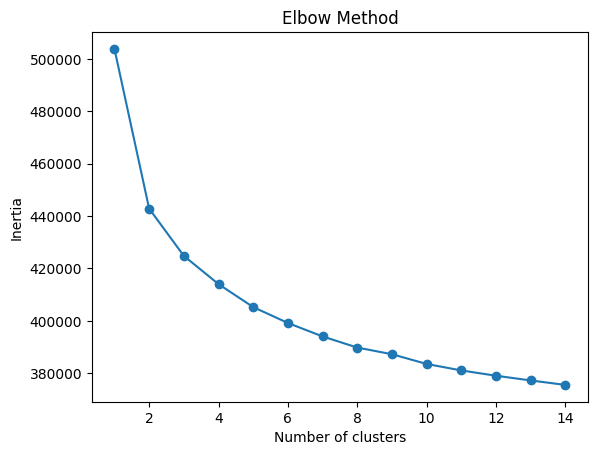

In [68]:
inertia = []

for k in range(1, 15):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [73]:
kmeans = KMeans(n_clusters=8, random_state=42)
listings['cluster'] = kmeans.fit_predict(X)
final_df = listings.merge(cluster_targets, on='id', how='left')

In [ ]:
# Results for final model
top_neigh = (
    final_df.groupby(['cluster', 'neighbourhood_cleansed'])['annual_revenue_adj']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'annual_revenue_adj', 'count': 'count'})
    .sort_values(['cluster', 'annual_revenue_adj'], ascending=[True, False])
)

top5_per_cluster = top_neigh.groupby('cluster').head(3)
print(top5_per_cluster)

     cluster  neighbourhood_cleansed  annual_revenue_adj  count
18         0               Islington        85354.315067    201
8          0                  Ealing        74425.646099     87
32         0             Westminster        72337.541134    446
41         1                  Ealing        80967.217238     58
52         1  Kensington and Chelsea        69727.463465    339
44         1                 Hackney        56845.908926    176
92         2    Richmond upon Thames       139159.666814     44
66         2    Barking and Dagenham       135856.287642     21
83         2                Hounslow       126252.370193     47
118        3  Kensington and Chelsea        65788.230596    227
128        3           Tower Hamlets        64278.867785    131
131        3             Westminster        55861.548963    357
151        4  Kensington and Chelsea        98722.199342    177
138        4          City of London        66113.235771     11
164        4             Westminster    